# 角点检测与形状匹配

In [23]:
import numpy as np
%matplotlib  inline
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt

In [24]:
img = cv2.cvtColor(cv2.imread('../datas/building_2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/building_2.jpg',0)
template = cv2.imread('../datas/building_2_template.jpg', 0)
target = cv2.imread('../datas/building_2.jpg',0)

In [25]:
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target, 127, 255, 0)

In [26]:
ret, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [27]:
sorted_contours = sorted(contours, key = cv2.contourArea, reverse = True)
template_contour = contours[1]

In [28]:
ret, contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [36]:
for c in contours:
    ## Iterate through each contour in the target image and 
    ###  use cv2.matchShape to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 1, 0.0)
#     print(match)
    ## if the match value is less than 0.15 we 
    if match < 0.15:
        closest_contour = c
        cv2.drawContours(img, [closest_contour], -1, (0, 255, 0), 3)
    else:
        closest_contour = []
        


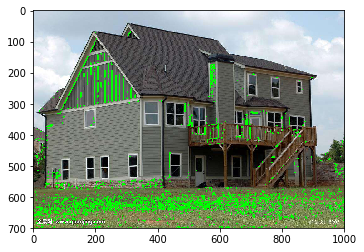

In [38]:
plt.imshow(img,'gray')